In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
plt.style.use('seaborn-deep')


In [3]:
df = pd.read_csv("owid-covid-data09-06.csv", index_col=0, header=0)

![title](img/covid.jpg)

Esta análise teve como objetivo verificar os dados globais, em seguida verificar o comportamento dos países.
Os dados foram obtidos no portal Our World in Data (https://ourworldindata.org/coronavirus), em 09 de junho de 2020.

# Total de Casos e Mortes - Mundo

In [6]:
df_global = df.loc["OWID_WRL", ["date","total_cases", "total_deaths"]]

In [7]:
df_global['date'] = pd.to_datetime(df_global['date'])

In [8]:
df_global.tail(10)

,date,total_cases,total_deaths
iso_code,,,
OWID_WRL,2020-05-31,6028326,368944
OWID_WRL,2020-06-01,6136294,371854
OWID_WRL,2020-06-02,6236775,375431
OWID_WRL,2020-06-03,6349294,379991
OWID_WRL,2020-06-04,6475978,385737
OWID_WRL,2020-06-05,6603649,390926
OWID_WRL,2020-06-06,6706329,394705
OWID_WRL,2020-06-07,6835946,398628
OWID_WRL,2020-06-08,6960418,402511


In [9]:
wrl_data = df_global['date']
wrl_totcases = df_global['total_cases']
wrl_totdeaths = df_global['total_deaths'] 

Text(0,0.5,'Total')

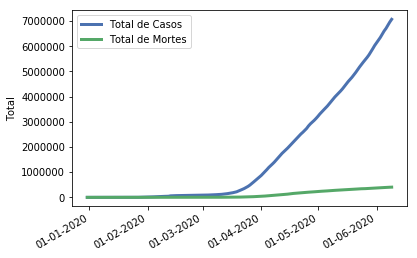

In [10]:
plt.plot_date(wrl_data, wrl_totcases , linestyle='solid', marker='None', label = "Total de Casos", linewidth=3.0)
plt.plot_date(wrl_data, wrl_totdeaths , linestyle='solid', marker = 'None', label = "Total de Mortes", linewidth=3.0)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.legend()


plt.ylabel('Total')

# Análise dos testes

In [11]:
df_testes = df[['location','total_deaths','total_cases','total_tests','gdp_per_capita', 'population']]

In [12]:
df_max = df_testes.groupby('location').apply(max).dropna()

cálculo population/testes

In [13]:
df_max['test_pop'] = df_max['population'] / df_max['total_tests']

cálculo coeficiente de incidencia para cada 100.000 hab

In [14]:
df_max['coef_inc'] = (df_max['total_cases'] / (df_max['population']/100000))

cálculo coeficiente de letalidade (%)

In [15]:
df_max['coef_let'] = (df_max['total_deaths'] / df_max['total_cases'])*100

In [16]:
df_max.sort_values(by='coef_inc', ascending=False)

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Qatar,Qatar,57,70158,265035.0,116935.600,2.881060e+06,10.870489,2435.145398,0.081245
Bahrain,Bahrain,26,15417,378235.0,43290.705,1.701583e+06,4.498745,906.038671,0.168645
Chile,Chile,2264,138846,746592.0,22767.037,1.911621e+07,25.604626,726.326020,1.630584
Singapore,Singapore,25,38296,264393.0,85535.383,5.850343e+06,22.127450,654.594098,0.065281
Luxembourg,Luxembourg,110,4040,88914.0,94277.965,6.259760e+05,7.040241,645.392156,2.722772
Peru,Peru,5571,199696,171719.0,12236.706,3.297185e+07,192.010471,605.656110,2.789740
United States,United States,111007,1961185,20814269.0,54225.446,3.310026e+08,15.902679,592.498283,5.660200
Iceland,Iceland,10,1807,62829.0,46482.958,3.412500e+05,5.431409,529.523810,0.553403
Belarus,Belarus,276,49453,632993.0,17167.967,9.449321e+06,14.928002,523.349773,0.558106


In [17]:
df_max.sort_values(by='coef_let', ascending = False)

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Belgium,Belgium,9609,59348,756888.0,42658.576,11589616.0,15.312194,512.079089,16.190942
Italy,Italy,33964,235278,4318650.0,35220.084,60461828.0,14.000169,389.134778,14.435689
United Kingdom,United Kingdom,40597,287399,3477545.0,39753.244,67886004.0,19.521244,423.355306,14.125658
Hungary,Hungary,548,4014,210202.0,26777.561,9660350.0,45.957460,41.551290,13.652217
Netherlands,Netherlands,6016,47739,414550.0,48472.545,17134873.0,41.333670,278.607259,12.601856
Spain,Spain,28752,241717,2822880.0,34272.360,46754783.0,16.562795,516.988818,11.894902
Mexico,Mexico,14053,120102,297963.0,17336.469,128932753.0,432.713971,93.150885,11.700888
Sweden,Sweden,4694,45133,325000.0,46949.283,10099270.0,31.074677,446.893686,10.400372
Ecuador,Ecuador,3642,43378,80796.0,10581.936,17643060.0,218.365513,245.864380,8.395961


os 10 países que mais testam (em relação ao total da população):

In [18]:
df_best = df_max.loc[df_max.test_pop < 14]

In [19]:
df_best.sort_values(by='test_pop')

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Bahrain,Bahrain,26,15417,378235.0,43290.705,1701583.0,4.498745,906.038671,0.168645
Iceland,Iceland,10,1807,62829.0,46482.958,341250.0,5.431409,529.523810,0.553403
Luxembourg,Luxembourg,110,4040,88914.0,94277.965,625976.0,7.040241,645.392156,2.722772
Lithuania,Lithuania,71,1720,340073.0,29524.265,2722291.0,8.005020,63.182077,4.127907
Denmark,Denmark,593,11962,594790.0,46682.515,5792203.0,9.738232,206.519005,4.957365
Qatar,Qatar,57,70158,265035.0,116935.600,2881060.0,10.870489,2435.145398,0.081245
Russia,Russia,5971,476658,13254678.0,24765.954,145934460.0,11.010034,326.624705,1.252680
Portugal,Portugal,1485,34885,873998.0,27936.896,10196707.0,11.666740,342.120255,4.256844
Ireland,Ireland,1683,25207,367780.0,67335.293,4937796.0,13.425950,510.490915,6.676717


os 10 países que menos testam (em relação ao total da população):

In [20]:
df_worst = df_max.loc[df_max.test_pop > 400]

In [21]:
df_worst.sort_values(by='test_pop', ascending = False)

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Nigeria,Nigeria,361,12801,79948.0,5338.454,206139587.0,2578.420811,6.209870,2.820092
Myanmar,Myanmar,6,244,39211.0,5591.597,54409794.0,1387.615567,0.448449,2.459016
Indonesia,Indonesia,1883,32033,281653.0,11188.744,273523621.0,971.136899,11.711237,5.878313
Ethiopia,Ethiopia,27,2156,152334.0,1729.927,114963583.0,754.681050,1.875376,1.252319
Zimbabwe,Zimbabwe,4,287,21354.0,1899.775,14862927.0,696.025428,1.930979,1.393728
Kenya,Kenya,85,2862,97340.0,2993.028,53771300.0,552.407027,5.322542,2.969951
Brazil,Brazil,36455,691758,485000.0,14103.452,212559409.0,438.266823,325.442192,5.269907
Mexico,Mexico,14053,120102,297963.0,17336.469,128932753.0,432.713971,93.150885,11.700888
Uganda,Uganda,0,646,112678.0,1697.707,45741000.0,405.944372,1.412300,0.000000


# Coef. de Incidência

os países com mais contaminação (a interpretação é que a cada 100ml hab, X estão infectados

In [22]:
df_inc = df_max.loc[df_max.coef_inc > 380]

In [23]:
df_inc.sort_values(by='coef_inc', ascending = False)

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Qatar,Qatar,57,70158,265035.0,116935.600,2881060.0,10.870489,2435.145398,0.081245
Bahrain,Bahrain,26,15417,378235.0,43290.705,1701583.0,4.498745,906.038671,0.168645
Chile,Chile,2264,138846,746592.0,22767.037,19116209.0,25.604626,726.326020,1.630584
Singapore,Singapore,25,38296,264393.0,85535.383,5850343.0,22.127450,654.594098,0.065281
Luxembourg,Luxembourg,110,4040,88914.0,94277.965,625976.0,7.040241,645.392156,2.722772
Peru,Peru,5571,199696,171719.0,12236.706,32971846.0,192.010471,605.656110,2.789740
United States,United States,111007,1961185,20814269.0,54225.446,331002647.0,15.902679,592.498283,5.660200
Iceland,Iceland,10,1807,62829.0,46482.958,341250.0,5.431409,529.523810,0.553403
Belarus,Belarus,276,49453,632993.0,17167.967,9449321.0,14.928002,523.349773,0.558106


# Letalidade

os países mais "letais" são os que possuem a maior proporção entre a quantidade de mortos e a de infectados.

In [24]:
df_let = df_max.loc[df_max.coef_let > 8]

In [25]:
df_let.sort_values(by='coef_let', ascending = False)

,location,total_deaths,total_cases,total_tests,gdp_per_capita,population,test_pop,coef_inc,coef_let
location,,,,,,,,,
Belgium,Belgium,9609,59348,756888.0,42658.576,11589616.0,15.312194,512.079089,16.190942
Italy,Italy,33964,235278,4318650.0,35220.084,60461828.0,14.000169,389.134778,14.435689
United Kingdom,United Kingdom,40597,287399,3477545.0,39753.244,67886004.0,19.521244,423.355306,14.125658
Hungary,Hungary,548,4014,210202.0,26777.561,9660350.0,45.957460,41.551290,13.652217
Netherlands,Netherlands,6016,47739,414550.0,48472.545,17134873.0,41.333670,278.607259,12.601856
Spain,Spain,28752,241717,2822880.0,34272.360,46754783.0,16.562795,516.988818,11.894902
Mexico,Mexico,14053,120102,297963.0,17336.469,128932753.0,432.713971,93.150885,11.700888
Sweden,Sweden,4694,45133,325000.0,46949.283,10099270.0,31.074677,446.893686,10.400372
Ecuador,Ecuador,3642,43378,80796.0,10581.936,17643060.0,218.365513,245.864380,8.395961


In [41]:
df_let.location.replace(["Belgium", "Italy", "United Kingdom", "Hungary", "Netherlands", "Spain", "Mexico","Sweden","Ecuador","Canada"],["Bélgica","Itália","Reino Unido", "Hungria","Holanda","Espanha","México","Suécia","Equador","Canadá"], inplace=True)

C:\Users\iriag\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


méxico e ecuador destoam na quantidade de Testes e no PIB per capta. O Brasil também aparecia, mas antes da mudança na política de contagens e informações de dados oficiais.

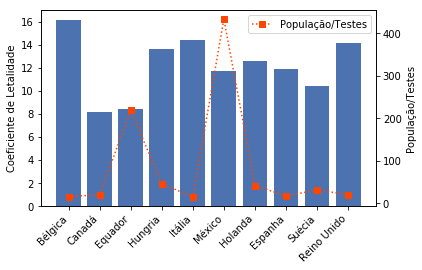

In [42]:
x = df_let['location']
y = df_let['coef_let']
z = df_let['test_pop']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(x,z, label="População/Testes",linestyle=":", marker='s', color="#FF4500")
ax1.bar(x,y, label="Letalidade")


plt.legend()
fig.autofmt_xdate(rotation=45)
ax1.set_ylabel("Coeficiente de Letalidade")
ax2.set_ylabel("População/Testes")

plt.show()